In [49]:
import sys
from pathlib import Path

# Setup import system
project_root = Path.cwd().parents[3]
sys.path.append(str(project_root))

In [50]:
import numpy as np
import pandas as pd

from src.homeworks.KNN.knn_classifier.KNNClassifier import KNNClassifier
from src.homeworks.KNN.processing.data_split import train_test_split
from src.homeworks.KNN.processing.scaling_strategies.min_max_scaler import MinMaxScaler 
from src.homeworks.KNN.processing.scaling_strategies.max_abs_scaler import MaxAbsScaler 
from src.homeworks.KNN.processing.scaling_strategies.standard_scaler import StandardScaler
from src.homeworks.KNN.processing.metrics import accuracy, f1_score
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv("cancer.csv")

In [107]:
df.head(5)

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [108]:
# M -> 0; B -> 1
df["label"] = pd.factorize(df["label"])[0]
df["label"].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [109]:
df[df.isna().any(axis=1)]
# No Nan in table

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30


In [56]:
X = df.drop(columns='label')
y = df['label']
tuple_x = [tuple(point) for point in X.values.tolist()]
X_train, X_test, y_train, y_test = train_test_split(tuple_x, y.tolist(), to_shuffle=True)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, to_shuffle=True)

In [57]:
# SCALING DATA

min_max = MinMaxScaler()
X_train_min_max = min_max.fit_transform(X_train)
X_validation_min_max = min_max.fit_transform(X_validation)
X_test_min_max = min_max.fit_transform(X_test)

max_abs = MaxAbsScaler()
X_train_max_abs = max_abs.fit_transform(X_train)
X_validation_max_abs = max_abs.fit_transform(X_validation)
X_test_max_abs = max_abs.fit_transform(X_test)

standart = StandardScaler()
X_train_standart = standart.fit_transform(X_train)
X_validation_standart = standart.fit_transform(X_validation)
X_test_standart = standart.fit_transform(X_test)

In [110]:
k_values = range(1, 100)

In [78]:
# Choosing best hyperparameters by metric

def best_hyperparameters(accuracy_matrix, f1_matrix, k_values, name="graph", to_save=True, to_show=True) -> tuple[int, int, float]:
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, accuracy_matrix, marker='o', label='Accuracy', linestyle='-', color='b')
    plt.plot(k_values, f1_matrix, marker='s', label='F1 Score', linestyle='-', color='g')
    plt.xlabel('K-values')
    plt.ylabel('Metrics')
    plt.title('Accuracy and F1 Score vs K-values')
    plt.legend()
    plt.grid(True)
    if to_save:
        plt.savefig(f"{name}.png")
    if to_show:
        plt.show()
    accuracy_index = int(np.argmax(accuracy_matrix))
    f1_index = int(np.argmax(f1_matrix))
    print(f"Best accuracy at k={k_values[accuracy_index]} ({accuracy_matrix[accuracy_index]:.3f})")
    print(f"Best f1_score at k={k_values[f1_index]} ({f1_matrix[f1_index]:.3f})")


In [113]:
# Compute accuracy and f1 

def get_accuracy_f1_matrix(X_train, X_validation, y_train, y_validation, k_values, leaf_size=5):
    accuracy_matrix = [0] * len(k_values)
    f1_matrix =[0] * len(k_values)
    for i, k in enumerate(k_values):
        model = KNNClassifier(k, leaf_size)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_validation)
        accuracy_matrix[i] = accuracy(y_validation, y_pred)
        f1_matrix[i] = f1_score(y_validation, y_pred)
    return accuracy_matrix, f1_matrix

<div align="center" style="font-size: 26px; font-weight: bold;">Without scaling</div>

In [111]:
# Compute accuracy and f1

X_t = X_train
X_v = X_validation
y_t = y_train
y_v = y_validation

accuracy_matrix_no_scale, f1_matrix_no_scale = get_accuracy_f1_matrix(X_t, X_v, y_t, y_v, k_values)

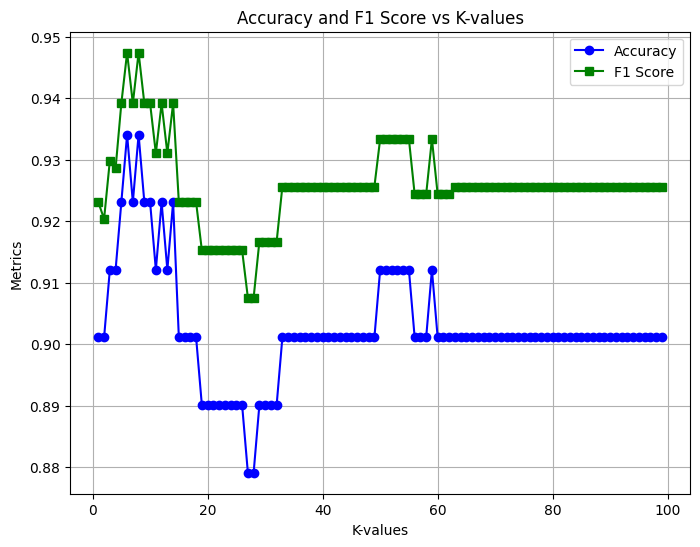

Best accuracy at k=6 (0.934)
Best f1_score at k=6 (0.947)


In [79]:
best_hyperparameters(accuracy_matrix_no_scale, f1_matrix_no_scale, k_values, name="no_scale")

The result is almost independent of leaf_size. The best result for both metrics **k=6**

**(accuracy 0.934, f1_score 0.947)**

In [94]:
k_no_scale = 6

<div align="center" style="font-size: 26px; font-weight: bold;">MinMax</div>

In [84]:
# Compute accuracy and f1 

X_t = X_train_min_max
X_v = X_validation_min_max
y_t = y_train
y_v = y_validation

accuracy_matrix_min_max, f1_matrix_min_max = get_accuracy_f1_matrix(X_t, X_v, y_t, y_v, k_values)

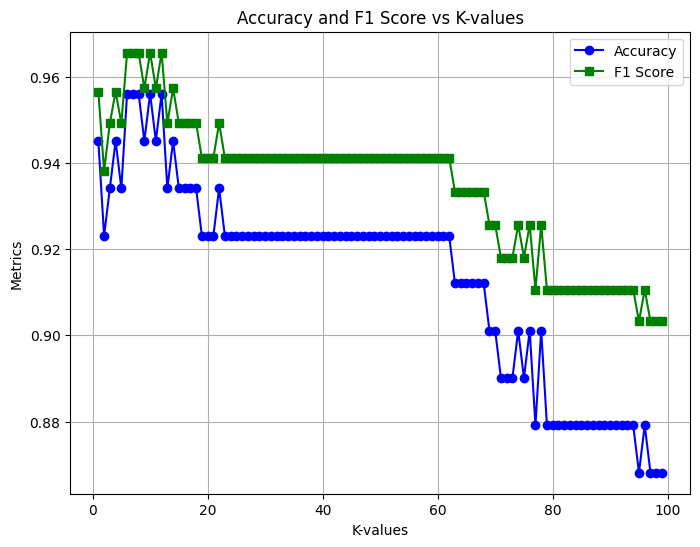

Best accuracy at k=6 (0.956)
Best f1_score at k=6 (0.966)


In [85]:
best_hyperparameters(accuracy_matrix_min_max, f1_matrix_min_max, k_values, name="min_max_scale")

The result is almost independent of leaf_size. The best result for both metrics **k=6**.

**(accuracy 0.956, f1_score 0.966)**

In [95]:
k_min_max = 6

<div align="center" style="font-size: 26px; font-weight: bold;">MaxAbs</div>

In [88]:
# Compute accuracy and f1 

X_t = X_train_max_abs
X_v = X_validation_max_abs
y_t = y_train
y_v = y_validation

accuracy_matrix_max_abs, f1_matrix_max_abs = get_accuracy_f1_matrix(X_t, X_v, y_t, y_v, k_values)

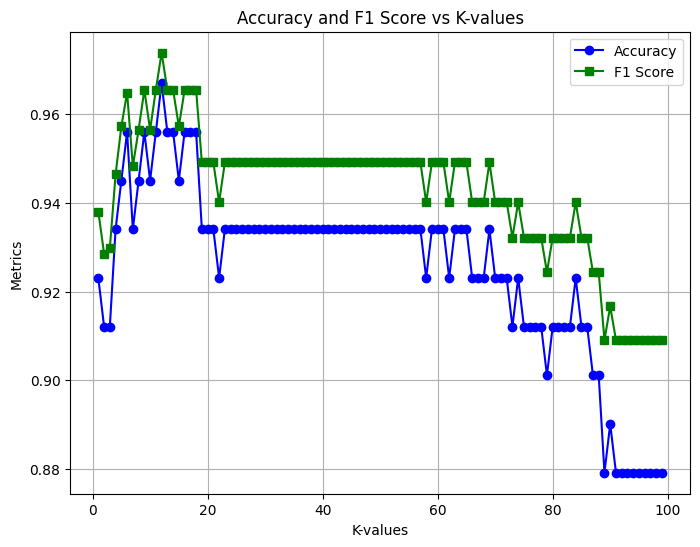

Best accuracy at k=12 (0.967)
Best f1_score at k=12 (0.974)


In [90]:
best_hyperparameters(accuracy_matrix_max_abs, f1_matrix_max_abs, k_values, name="max_abs_scale")

The result is almost independent of leaf_size. The best result for both metrics **k=12**.

**(accuracy 0.967, f1_score 0.974)**

In [97]:
k_max_abs = 12

<div align="center" style="font-size: 26px; font-weight: bold;">StandardScaler</div>

In [112]:
# Compute accuracy and f1 

X_t = X_train_standart
X_v = X_validation_standart
y_t = y_train
y_v = y_validation

accuracy_matrix_standart, f1_matrix_standart = get_accuracy_f1_matrix(X_t, X_v, y_t, y_v, k_values)

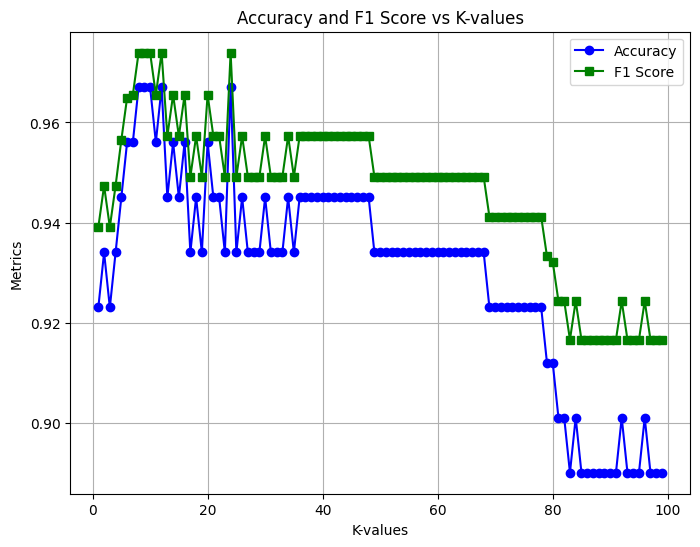

Best accuracy at k=8 (0.967)
Best f1_score at k=8 (0.974)


In [92]:
best_hyperparameters(accuracy_matrix_standart, f1_matrix_standart, k_values, name="standart_scale")

The result is almost independent of leaf_size. The best result for both metrics **k=8**.

**(accuracy 0.967, f1_score 0.974)**

In [98]:
k_standart = 8

<div align="center" style="font-size: 26px; font-weight: bold;">Run test</div>

In [99]:
knn_no_scale = KNNClassifier(k_no_scale, leaf_size=5)
knn_no_scale.fit(X_train, y_train)
result_no_scale = knn_no_scale.predict(X_test)

In [100]:
knn_min_max = KNNClassifier(k_min_max, leaf_size=5)
knn_min_max.fit(X_train_min_max, y_train)
result_min_max = knn_min_max.predict(X_test_min_max)

In [101]:
knn_max_abs = KNNClassifier(k_max_abs, leaf_size=5)
knn_max_abs.fit(X_train_max_abs, y_train)
result_max_abs = knn_max_abs.predict(X_test_max_abs)

In [102]:
knn_standart = KNNClassifier(k_standart, leaf_size=5)
knn_standart.fit(X_train_standart, y_train)
result_standart = knn_standart.predict(X_test_standart)

In [103]:
accuracy_no_scale = accuracy(result_no_scale, y_test)
accuracy_min_max = accuracy(result_min_max, y_test)
accuracy_max_abs = accuracy(result_max_abs, y_test)
accuracy_standart = accuracy(result_standart, y_test)

f1_no_scale = f1_score(result_no_scale, y_test)
f1_min_max = f1_score(result_min_max, y_test)
f1_max_abs = f1_score(result_max_abs, y_test)
f1_standart = f1_score(result_standart, y_test)

print(f"""NoScale Accuracy={accuracy_no_scale:.3f}, f1_score={f1_no_scale:.3f}
MinMax Accuracy={accuracy_min_max:.3f}, f1_score={f1_min_max:.3f}
MaxAbs Accuracy={accuracy_max_abs:.3f}, f1_score={f1_max_abs:.3f}
StandartScale Accuracy={accuracy_standart:.3f}, f1_score={f1_standart:.3f}""")

NoScale Accuracy=0.947, f1_score=0.958
MinMax Accuracy=0.982, f1_score=0.986
MaxAbs Accuracy=0.982, f1_score=0.986
StandartScale Accuracy=0.965, f1_score=0.972


**MinMaxScale, k=6**

Accuracy = 0.982, f1 = 0.986